In [99]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [100]:
seg_img=nib.load('BraTS20_Training_001_seg.nii')

In [101]:
data=seg_img.get_fdata()
data_array=np.array(data)

In [102]:
hor_cut=data_array[:,:,70]

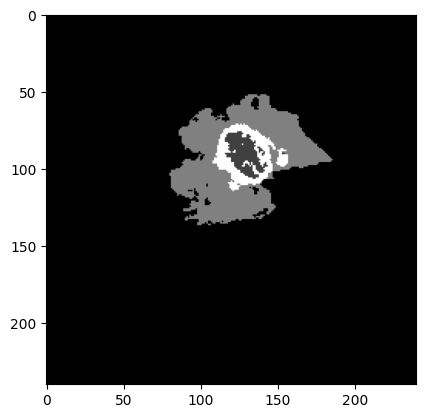

In [103]:
plt.imshow(hor_cut,cmap='gray')
plt.show()

In [104]:
print(np.max(data_array))
print(np.unique(data_array))


4.0
[0. 1. 2. 4.]


In [105]:
imt_logo=np.zeros((8,16))
imt_logo[0,:]=[1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]
imt_logo[1,:]=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]
imt_logo[2,:]=[1,0,0,1,1,1,0,1,0,1,0,1,1,1,0,0]
imt_logo[3,:]=[0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,1]
imt_logo[4,:]=[1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0]
imt_logo[5,:]=[0,0,0,1,1,1,0,1,0,1,0,0,1,0,0,1]
imt_logo[6,:]=[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
imt_logo[7,:]=[0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1]


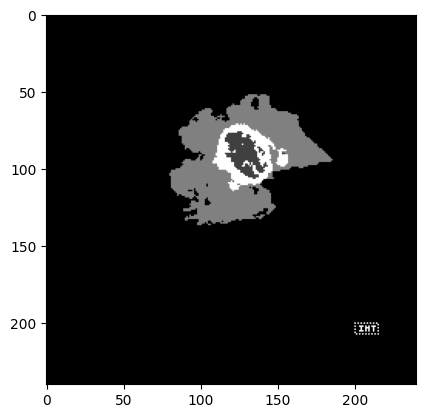

In [106]:
hor_cut[200:208,200:216]=4*imt_logo

plt.imshow(hor_cut,cmap='gray') 

In [107]:
import numpy as np

def resize_matrix(matrix):
    rows, cols = matrix.shape
    new_rows = rows * 2
    new_cols = cols * 2
    resized_matrix = np.zeros((new_rows, new_cols))
    for i in range(rows):
        for j in range(cols):
            resized_matrix[i*2, j*2] = matrix[i, j]
    return resized_matrix
resized_matrix = resize_matrix(imt_logo)

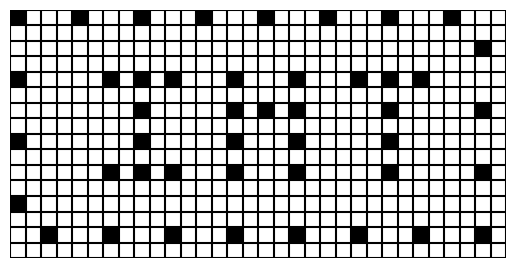

In [108]:
plt.imshow(resized_matrix, cmap='binary')
plt.axis('off')
rows, cols = resized_matrix.shape
for i in range(rows + 1):
    plt.axhline(y=i - 0.5, color='black', linewidth=1.5)  # Horizontal lines

for j in range(cols + 1):
    plt.axvline(x=j - 0.5, color='black', linewidth=1.5)  # Turn off axis
plt.show()

In [109]:
hor_cut[200:216,200:232]=resized_matrix
hor_cut[204:212,208:224]=2*imt_logo
bit_message=hor_cut[200:216,200:232]

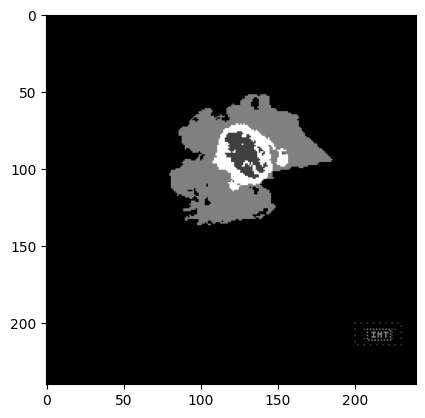

In [110]:
plt.imshow(hor_cut,cmap='gray')


In [111]:
logo_img=cv2.imread('photos/imt_logo.jpg',0)
logo_img=cv2.resize(logo_img,(128,64))
logo_img=logo_img[20:46,20:110]


In [112]:
print(logo_img.shape)
print(np.min(logo_img))
print(np.max(logo_img))
logo_img=(logo_img/255)
logo_img=4*logo_img

logo_img=(logo_img).astype(int)
logo_img=4-logo_img



(26, 90)
124
255


[0 1 2 4]


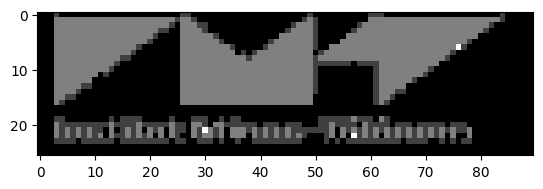

In [113]:
logo_img[logo_img==3]=4
print(np.unique(logo_img))
plt.imshow(logo_img,cmap='gray')

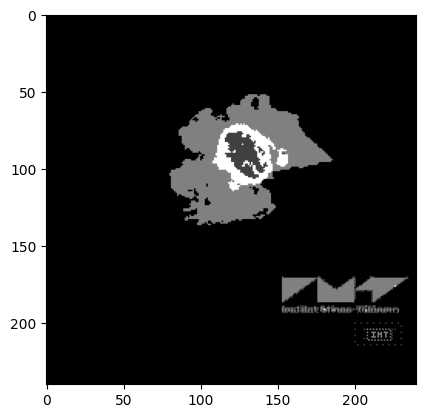

In [114]:
hor_cut=np.copy(data_array[:,:,70])
h,w=logo_img.shape
hor_cut[170:170+h,150:150+w]=logo_img
plt.imshow(hor_cut,cmap='gray')

In [116]:
def seg_embedder(start_cor,logo_img,data_array,logo_bit,method=0):
    if method==0:
        h,w=logo_img.shape
        for t in range(5):
            data_array[start_cor[0]:start_cor[0]+h,start_cor[1]:start_cor[1]+w,70+t]=logo_img
    else:
        h,w=logo_bit.shape
        data_array[start_cor[0]:start_cor[0]+h,start_cor[1]:start_cor[1]+w,70+t]=logo_bit
    
    return data_array


In [117]:
embedded_segs=seg_embedder([170,150],logo_img,data_array,bit_message,method=0)

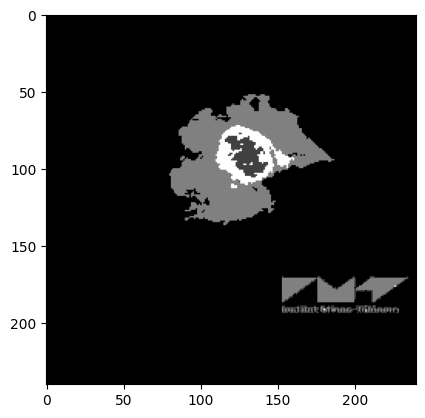

In [118]:
plt.imshow(embedded_segs[:,:,71],cmap='gray')

In [119]:
import nibabel as nib
import numpy as np

new_img = nib.Nifti1Image(embedded_segs,affine=np.eye(4))
nib.save(new_img, 'new_data\embedded_data_segs.nii')
